<a href="https://colab.research.google.com/github/mckolu/DataScience/blob/main/Fundamentals_IRIS_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Tensorflow with IRIS Dataset [Link](https://medium.com/@nutanbhogendrasharma/tensorflow-deep-learning-model-with-iris-dataset-8ec344c49f91)



In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
# print(tf.__version__) # check the version (should be 2.x+)

In [ ]:
dataset = pd.read_csv('https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv')


dataset = dataset.sample(frac=1, random_state=42).reset_index(drop=True)
dataset


,sepal.length,sepal.width,petal.length,petal.width,variety
0,6.1,2.8,4.7,1.2,Versicolor
1,5.7,3.8,1.7,0.3,Setosa
2,7.7,2.6,6.9,2.3,Virginica
3,6.0,2.9,4.5,1.5,Versicolor
4,6.8,2.8,4.8,1.4,Versicolor
...,...,...,...,...,...
145,6.1,2.8,4.0,1.3,Versicolor
146,4.9,2.5,4.5,1.7,Virginica
147,5.8,4.0,1.2,0.2,Setosa
148,5.8,2.6,4.0,1.2,Versicolor


In [ ]:
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

In [ ]:
# https://machinelearningmastery.com/why-one-hot-encode-data-in-machine-learning/

# If the output is ordinal, we can use either the integer encoding or one-hot encoding. In fact, using the integer encoding makes the model assume a natural ordering between categories and it may result in poor performance or unexpected results (predictions halfway between categories).
# If the output is nominal, we have to use one-hot encoding.

# INTEGER ENCODING
# from sklearn.preprocessing import LabelEncoder
# encoder =  LabelEncoder()
# y = encoder.fit_transform(y)  

# ONE-HOT ENCODING
y = pd.get_dummies(y).values 
print(y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(120, 4)

In [ ]:
# Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax') # 3 comes from the number of the output classes
  ])

In [ ]:
# Compile the model (same as above)
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Fit the model (this time we'll train for longer)
history = model.fit(X_train, y_train, batch_size=50, verbose=0, epochs=100)

Text(0.5, 0, 'epochs')

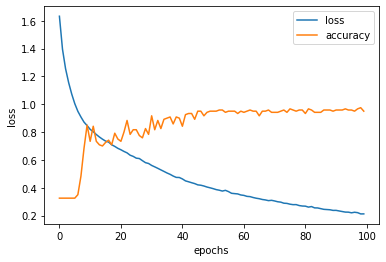

In [ ]:
# Plot history (loss curve)
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot()

plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([[1.49543688e-03, 1.32941067e-01, 8.65563512e-01],
       [1.95254758e-02, 6.97349608e-01, 2.83124924e-01],
       [1.02552265e-01, 8.13022852e-01, 8.44248533e-02],
       [9.82041478e-01, 1.79533157e-02, 5.21627635e-06],
       [1.61551405e-03, 2.05797032e-01, 7.92587459e-01],
       [9.94040430e-01, 5.95906842e-03, 4.77830326e-07],
       [2.33513545e-02, 7.16756582e-01, 2.59892076e-01],
       [2.45771203e-02, 8.22488487e-01, 1.52934432e-01],
       [9.76959050e-01, 2.30228677e-02, 1.80991756e-05],
       [9.87246275e-01, 1.27452360e-02, 8.47692536e-06],
       [1.20676663e-02, 6.05717361e-01, 3.82214904e-01],
       [9.91612434e-01, 8.38463102e-03, 2.91514721e-06],
       [1.99575964e-02, 8.25748801e-01, 1.54293597e-01],
       [3.74335088e-02, 8.18122208e-01, 1.44444272e-01],
       [4.52842127e-04, 6.55409768e-02, 9.34006155e-01],
       [9.86632407e-01, 1.33611839e-02, 6.42566056e-06],
       [8.39193526e-04, 1.32457614e-01, 8.66703212e-01],
       [2.46232878e-02, 8.14774

In [ ]:
# CONVERT ONE HOT ENCODING BACK TO NUMERICAL
# The numpy.argmax() function returns indices of the max element of the array in a particular axis. 
y_true = np.argmax(y_test,axis=1) 
y_pred = np.argmax(y_pred,axis=1)
y_pred

array([2, 1, 1, 0, 2, 0, 1, 1, 0, 0, 1, 0, 1, 1, 2, 0, 2, 1, 1, 0, 0, 2,
       2, 0, 2, 1, 0, 2, 1, 0])

In [ ]:
test_accuracy = tf.keras.metrics.Accuracy()
test_accuracy(y_true, y_pred)

<tf.Tensor: shape=(), dtype=float32, numpy=1.0>

In [ ]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_true, y_pred, average='macro')

(1.0, 1.0, 1.0, None)

In [ ]:
from sklearn.metrics import classification_report
target_names = ['Setosa', 'Versicolor', 'Virginica']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        11
  Versicolor       1.00      1.00      1.00        11
   Virginica       1.00      1.00      1.00         8

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [ ]:
# from sklearn.metrics import multilabel_confusion_matrix
# multilabel_confusion_matrix(y_true, y_pred)